# Using MLflow


- Allows us to train, track experiments.
- Allows Machine Learning Tracking.
- Experiment tracking, epoch tracking, hyperparameter tracking.
- Features tracking, model tracking, code tracking.
- SageMaker, Azure, GCP supports MLflow
- Used in multiple languages, R, Python, Java, Scala
- Has UI also

# Installing

In [0]:
! pip install --quiet mlflow

In [0]:
import mlflow
import mlflow.sklearn

# Load data

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
data = load_iris()

In [47]:
# print(data)
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [48]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
X = data.data
Y = data.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=31)

# Some EDA

- Even the EDA results can be tracked by MLFlow.
- MLFlow will help in tracking data.

In [0]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [0]:
X = data.data[:, :2]
y = data.target

In [0]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [54]:
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 576x432 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

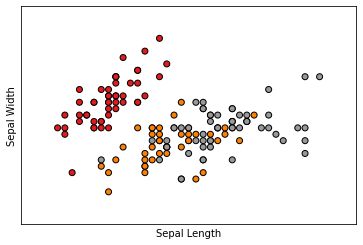

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks([])
plt.yticks([])

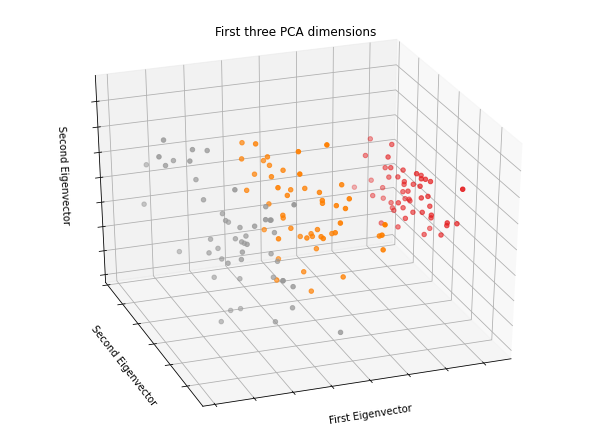

In [56]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("First Eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("Second Eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("Second Eigenvector")
ax.w_zaxis.set_ticklabels([])

fig.savefig('iris1.png')

# Using MLFlow

- It takes the pickle file and saves along with the experiment.
- It saves the png file of eda as well.
- It can even log the feature names.
- It can track as many artifacts, metrics and models.

In [58]:
with mlflow.start_run():
    dtc = DecisionTreeClassifier(random_state=10)
    dtc.fit(X_train,y_train)
    y_pred_class = dtc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)

    print(accuracy)
    mlflow.log_param("random_state", 10)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(dtc, "model")
    modelpath = "/content/mlflow/iris/model-%s-%d" %("decision_tree", 2)
    mlflow.sklearn.save_model(dtc, modelpath)
    mlflow.log_artifact("iris1.png")

0.8666666666666667


- conda.yaml contains all the dependencies.
- it saves the plots as well.
- it saves the pickle file of the model.
- it has mlmodel file which describes the particular run.

In [0]:
! mlflow ui

In [61]:
with mlflow.start_run():
    dtc = DecisionTreeClassifier(max_depth=1, random_state=10)
    dtc.fit(X_train,y_train)
    y_pred_class = dtc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)

    print(accuracy)
    mlflow.log_param("random_state", 10)
    mlflow.log_param("max_depth", 1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(dtc, "model")
    modelpath = "/content/mlflow/iris/model-%s-%d" %("decision_tree", 3)
    mlflow.sklearn.save_model(dtc, modelpath)
    mlflow.log_artifact("iris1.png")

0.6666666666666666


In [62]:
with mlflow.start_run():
    dtc = DecisionTreeClassifier(max_depth=1, min_samples_split=5, random_state=10)
    dtc.fit(X_train,y_train)
    y_pred_class = dtc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)

    print(accuracy)
    mlflow.log_param("random_state", 10)
    mlflow.log_param("max_depth", 1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_param("min_samples_split", 5)
    mlflow.sklearn.log_model(dtc, "model")
    modelpath = "/content/mlflow/iris/model-%s-%d" %("decision_tree", 4)
    mlflow.sklearn.save_model(dtc, modelpath)
    mlflow.log_artifact("iris1.png")

0.6666666666666666


Let's trt another classifier

In [65]:
with mlflow.start_run():
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train,y_train)
    y_pred_class = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print(accuracy)
    mlflow.log_param("n_neighbors", 2)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(knn, "model")
    model_path = "/content/mlflow/iris/model-%s-%d" %("knn", 1)
    mlflow.sklearn.save_model(knn, model_path)
    mlflow.log_artifact("iris1.png")


0.8666666666666667


In [66]:
with mlflow.start_run():
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_pred_class = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print(accuracy)
    mlflow.log_param("n_neighbors", 5)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(knn, "model")
    model_path = "/content/mlflow/iris/model-%s-%d" %("knn", 5)
    mlflow.sklearn.save_model(knn, model_path)
    mlflow.log_artifact("iris1.png")


0.9333333333333333


In [68]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.n_neighbors,params.random_state,params.min_samples_split,params.max_depth,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.log-model.history,tags.mlflow.user
0,9ac9e0aa8ce648cfab58c70d33da74e4,0,FINISHED,file:///content/mlruns/0/9ac9e0aa8ce648cfab58c...,2020-04-01 16:08:57.486000+00:00,2020-04-01 16:08:57.538000+00:00,0.933333,5,None,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""9ac9e0aa8ce648cfab58c70d33da74e4""...",root
1,1b033e14c9a844b898861a85b51399c3,0,FINISHED,file:///content/mlruns/0/1b033e14c9a844b898861...,2020-04-01 16:07:29.345000+00:00,2020-04-01 16:07:29.388000+00:00,0.866667,2,None,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""1b033e14c9a844b898861a85b51399c3""...",root
2,0ff287a98bd44fe098b270c91d7c97b1,0,FAILED,file:///content/mlruns/0/0ff287a98bd44fe098b27...,2020-04-01 16:07:23.454000+00:00,2020-04-01 16:07:23.497000+00:00,0.866667,2,None,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""0ff287a98bd44fe098b270c91d7c97b1""...",root
3,751d6ae6305c4f7a92fb1732fb211903,0,FAILED,file:///content/mlruns/0/751d6ae6305c4f7a92fb1...,2020-04-01 16:07:14.093000+00:00,2020-04-01 16:07:14.131000+00:00,0.866667,2,None,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,None,root
4,385ad072325e4ccf9861870eea07e16d,0,FINISHED,file:///content/mlruns/0/385ad072325e4ccf98618...,2020-04-01 16:04:14.458000+00:00,2020-04-01 16:04:14.518000+00:00,0.666667,None,10,5,1,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""385ad072325e4ccf9861870eea07e16d""...",root
5,215610a8705946898da499f77be40c5f,0,FINISHED,file:///content/mlruns/0/215610a8705946898da49...,2020-04-01 16:02:53.145000+00:00,2020-04-01 16:02:53.201000+00:00,0.666667,None,10,None,1,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""215610a8705946898da499f77be40c5f""...",root
6,349375593ae84275a662fb63b8a0c0fe,0,FAILED,file:///content/mlruns/0/349375593ae84275a662f...,2020-04-01 16:02:30.129000+00:00,2020-04-01 16:02:30.177000+00:00,0.666667,None,10,None,1,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""349375593ae84275a662fb63b8a0c0fe""...",root
7,af9b4ce9ac8b4b958ea86297ecdbcf60,0,FINISHED,file:///content/mlruns/0/af9b4ce9ac8b4b958ea86...,2020-04-01 15:54:58.579000+00:00,2020-04-01 15:54:58.632000+00:00,0.866667,None,10,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""af9b4ce9ac8b4b958ea86297ecdbcf60""...",root
8,8bbe2f682f144861abf771eee2c23dc6,0,FAILED,file:///content/mlruns/0/8bbe2f682f144861abf77...,2020-04-01 15:54:46.960000+00:00,2020-04-01 15:54:47.016000+00:00,0.866667,None,10,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""8bbe2f682f144861abf771eee2c23dc6""...",root
9,b9dc88612de04892b9e09c0a1d4c2e91,0,FINISHED,file:///content/mlruns/0/b9dc88612de04892b9e09...,2020-04-01 15:09:09.376000+00:00,2020-04-01 15:09:09.428000+00:00,0.866667,None,10,None,None,LOCAL,/usr/local/lib/python3.6/dist-packages/ipykern...,"[{""run_id"": ""b9dc88612de04892b9e09c0a1d4c2e91""...",root


# Using Models

Use the run id from mlflow.search_runs()

In [0]:
run_id1 = "9ac9e0aa8ce648cfab58c70d33da74e4"
model_uri = "runs:/" + run_id1 + "/model"

In [0]:
model = mlflow.sklearn.load_model(model_uri=model_uri)

In [71]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [0]:
predictions = model.predict_proba(X_test)